In [2]:
#Importing packages and data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/sfs/weka/scratch/khs2fu/DS 3001/pierce_county_house_sales.csv')
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [3]:
#Part 1 Clean/Basic EDA 
df.isnull().sum()#Checking for null values 

sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64

In [4]:
#Deleting waterfront type and view quality (empty columns 
df.drop('waterfront_type', axis=1, inplace=True)
df.drop('view_quality', axis=1, inplace=True)
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,SEWER/SEPTIC INSTALLED


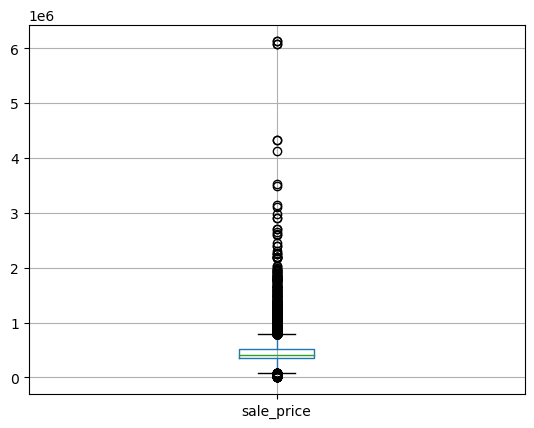

In [5]:
df.boxplot(column=['sale_price']) #Outliers 
plt.show()
#There appear to be several outliers around 6 with the sale price variable

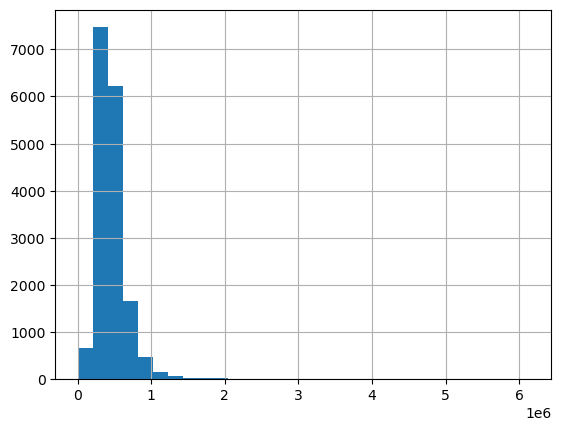

In [6]:
df['sale_price'].hist(bins=30) #EDA Histogram 
plt.show()

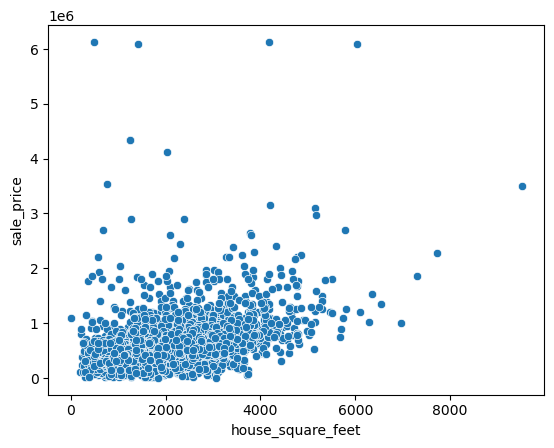

In [7]:
sns.scatterplot(data=df,y='sale_price',x='house_square_feet') 
plt.show()
#outliers are shown in this plot too

In [8]:
# Drop outliers:
df = df.loc[df['sale_price']>=6,:]

In [9]:
#Part 2 Transforming Catagorical Variables 
interior_unique_values = df['interior'].unique()
print(interior_unique_values)
roof_unique_values = df['roof_cover'].unique()
print(roof_unique_values)
sewer_unique_values = df['utility_sewer'].unique()
print(sewer_unique_values)
exterior_unique_values = df['exterior'].unique()
print(exterior_unique_values)

['Drywall' nan 'Paneling']
['Composition Shingle' 'Built Up Rock' 'Wood Shake' 'Concrete Tile'
 'Preformed Metal' 'Formed Seam Metal' nan]
['SEWER/SEPTIC INSTALLED' 'SEWER AVAILABLE' 'SEWER/SEPTIC NO'
 'SEWER/SEPTIC NO PERC' 'SEWER/SEPTIC AVAIL']
['Frame Siding' 'Frame Vinyl' 'Masonry Concrete Block'
 'Masonry Common Brick' 'Frame Stucco' 'Finished Cottage'
 'Frame Hardboard' 'Frame Rustic Log' 'Log' 'Unfinished Cottage'
 'Pine Finished Cabin' 'Cedar Finished Cabin' nan 'Cedar A-Frame'
 'Pine A-Frame' 'Cedar Unfinished Cabin' 'Pine Unfinished Cabin']


In [10]:
#Cleaning out NAs 
df['interior'].fillna(df['interior'].mode()[0], inplace=True)  # Fill missing values with the mode (most frequent value)
df['roof_cover'].fillna(df['roof_cover'].mode()[0], inplace=True)  # Fill missing values with the mode (most frequent value)
df['utility_sewer'].fillna(df['utility_sewer'].mode()[0], inplace=True)  # Fill missing values with the mode (most frequent value)
df['exterior'].fillna(df['exterior'].mode()[0], inplace=True)  # Fill missing values with the mode (most frequent value)

#Changing Date to numeric (used help from ChatGPT for this code) 
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_date'] = (df['sale_date'] - df['sale_date'].min()) / pd.Timedelta(days=1)
    
#Hot encoding categoricals 
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()



,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,...,interior_Paneling,roof_cover_Composition Shingle,roof_cover_Concrete Tile,roof_cover_Formed Seam Metal,roof_cover_Preformed Metal,roof_cover_Wood Shake,utility_sewer_SEWER/SEPTIC AVAIL,utility_sewer_SEWER/SEPTIC INSTALLED,utility_sewer_SEWER/SEPTIC NO,utility_sewer_SEWER/SEPTIC NO PERC
0,1.0,380000,2157,0,0,528,0,0,2,1993,...,False,True,False,False,False,False,False,True,False,False
1,1.0,383000,2238,0,0,396,0,0,2,2017,...,False,True,False,False,False,False,False,True,False,False
2,0.0,419900,1452,0,0,0,0,1,1,1965,...,False,False,False,False,False,False,False,True,False,False
3,1.0,251660,832,0,0,0,0,0,1,1919,...,False,True,False,False,False,False,False,True,False,False
4,1.0,500000,1780,0,384,484,0,1,1,1955,...,False,True,False,False,False,False,False,True,False,False


In [11]:
#Part 3 80/20 split 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('sale_price', axis=1)  
y = df_encoded['sale_price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Part 4 Simple linear Models 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# RMSE calculation
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Training RMSE: 171913.3365031431
Test RMSE: 198594.54959660096


In [13]:
#Part 4 Simple linear Models  
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df_encoded['sale_price']
X = df_encoded.loc[:,['house_square_feet', 'stories', 'year_built', 'bedrooms'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) 

Z_train = pd.concat([X_train['house_square_feet'], X_train['stories'], X_train['year_built'], X_train['bedrooms']], axis=1)
Z_test = pd.concat([X_test['house_square_feet'], X_test['stories'], X_test['year_built'], X_test['bedrooms']], axis=1)  

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) 

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

Rsq:  0.3186570190593214
RMSE:  225021.82492199037
            variable   coefficient
0  house_square_feet    203.049853
1            stories -66815.065196
2         year_built    147.119485
3           bedrooms -33240.115275


In [14]:
#Part 4 Simple linear Models  
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df_encoded['sale_price']
X = df_encoded.loc[:,['house_square_feet', 'stories'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) 

Z_train = pd.concat([X_train['house_square_feet'], X_train['stories']], axis=1)
Z_test = pd.concat([X_test['house_square_feet'], X_test['stories']], axis=1)  

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) 

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

Rsq:  0.2517845734762768
RMSE:  235806.12327912552
            variable   coefficient
0  house_square_feet    216.562828
1            stories  21210.420243


In [15]:
#The more complicated model including more vairables was worse than the simpler one I made, based on the R squared value, further some of the coefficients for stories and bedrooms don't make sense to me, as they increase logically the sale price should increase too, and as the year built increases the house would be newer and in theory be worth more so the relationship should be negative, still niether are very good at this point.

In [23]:
#Part 5 More Complex Linear Regression Model (Used Chat GPT for some portions like the polynomial 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
y = df_encoded['sale_price']
X = df_encoded[['house_square_feet', 'fireplaces', 'stories', 'year_built', 'bedrooms', 'bathrooms', 'basement_square_feet']]

# Creating log transformations 
X_transformed = X.copy()
X_transformed['house_square_feet'] = np.log1p(X_transformed['house_square_feet'])
X_transformed['basement_square_feet'] = np.log1p(X_transformed['basement_square_feet'])

# Creating interaction terms 
X_transformed['sqft_stories'] = X_transformed['house_square_feet'] * X_transformed['stories']  
X_transformed['bathrooms_bedrooms'] = X_transformed['bathrooms'] * X_transformed['bedrooms']  

# Creating Polynomials 
poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly.fit_transform(X_transformed[['house_square_feet', 'bathrooms', 'bedrooms']]) 
poly_columns = poly.get_feature_names_out(['house_square_feet', 'bathrooms', 'bedrooms'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_columns)
X_final = pd.concat([X_transformed[['fireplaces', 'stories']], X_poly_df], axis=1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=100)

# Fitting the Linear Regression model/making prediction
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculating RMSE and R Squared 
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = reg.score(X_train, y_train)
test_r2 = reg.score(X_test, y_test)

# Print results
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')
coefficients = pd.DataFrame({'variable': X_final.columns, 'coefficient': reg.coef_})
print(coefficients)

Training RMSE: 185031.64378953422
Test RMSE: 222418.80086354844
Training R^2: 0.3297063361609527
Test R^2: 0.334329223817763
                       variable    coefficient
0                    fireplaces   46700.092142
1                       stories  -67454.729613
2             house_square_feet -883918.592955
3                     bathrooms -461007.282612
4                      bedrooms   49537.520182
5           house_square_feet^2   71794.077989
6   house_square_feet bathrooms   61432.755991
7    house_square_feet bedrooms  -13770.169679
8                   bathrooms^2   13442.025243
9            bathrooms bedrooms   -4322.809554
10                   bedrooms^2    3524.168570


In [ ]:
#My more complect model was marginally better in terms of R squared and RMSE but I suspect some overfitting and still don't fully understand some of the coefficient values logically.

In [ ]:
#Part 6 This lab taught me a lot about the weak points in my coding background and what